<a href="https://colab.research.google.com/github/Majoonho/TIL/blob/main/gridsearhcv__test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 14.5 MB/s 
     |████████████████████████████████| 209 kB 39.4 MB/s 
     |████████████████████████████████| 81 kB 4.9 MB/s 
     |████████████████████████████████| 78 kB 2.1 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 112 kB 46.6 MB/s 
     |████████████████████████████████| 146 kB 51.2 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=cb4b5078abeb7826127be6299cffcff8d34a3d93bd5556e9c5e92a37d4a69893
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [2]:
# 데이터분석 4종 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 모델들, 성능 평가
# (저는 일반적으로 정형데이터로 머신러닝 분석할 때는 이 2개 모델은 그냥 돌려봅니다. 특히 RF가 테스트하기 좋습니다.)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from lightgbm.sklearn import LGBMClassifier
from lightgbm.sklearn import LGBMRegressor

# 상관관계 분석, VIF : 다중공선성 제거
from statsmodels.stats.outliers_influence import variance_inflation_factor

# KFold(CV), partial : optuna를 사용하기 위함
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from functools import partial

import optuna

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path='/content/drive/MyDrive/minipjt34/'

In [5]:
# 데이터를 불러옵니다.
train =pd.read_csv(base_path + 'train_V2.csv')
test = pd.read_csv(base_path + 'test_V2.csv')
submission = pd.read_csv(base_path + 'sample_submission_V2.csv')

In [6]:
feature_reducing = "feature_importance"

In [7]:
temp1=train.copy()

In [8]:
#데이터크기축소
temp1 = temp1.sample(frac=0.15, random_state=42, replace=False)

In [ ]:
len(temp1)

667045

In [9]:
def seek_bug_group_min(temp, match, min_num):

    group_i = temp.loc[temp.matchType == match,:]

    min_i = group_i[group_i['numGroups']<min_num]

    return min_i


def seek_bug_group_max(temp, match, max_num):

    group_i = temp.loc[temp.matchType == match,:]

    max_i = group_i[group_i['numGroups']>max_num]

    return max_i

# squad min bug
squad_min_bug = seek_bug_group_min(temp1, 'squad', 25)
squad_fpp_min_bug = seek_bug_group_min(temp1, 'squad-fpp', 25)
normal_squad_fpp_min_bug = seek_bug_group_min(temp1, 'normal-squad-fpp', 25)
normal_squad_min_bug = seek_bug_group_min(temp1, 'normal-squad', 25)

# duo min bug
duo_min_bug = seek_bug_group_min(temp1, 'duo', 44)
duo_fpp_min_bug = seek_bug_group_min(temp1, 'duo-fpp', 44)
normal_duo_fpp_min_bug = seek_bug_group_min(temp1, 'normal-duo-fpp', 44)
normal_duo_min_bug = seek_bug_group_min(temp1, 'normal-duo', 44)


# solo min bug
solo_fpp_min_bug = seek_bug_group_min(temp1, 'solo-fpp', 85)
solo_min_bug = seek_bug_group_min(temp1, 'solo', 85)
normal_solo_fpp_min_bug = seek_bug_group_min(temp1, 'normal-solo-fpp', 85)
normal_solo_min_bug = seek_bug_group_min(temp1, 'normal-solo', 85)

# squad max bug
squad_max_bug = seek_bug_group_max(temp1, 'squad', 32)
squad_fpp_max_bug = seek_bug_group_max(temp1, 'squad-fpp', 32)
normal_squad_fpp_max_bug = seek_bug_group_max(temp1, 'normal-squad-fpp', 32)
normal_squad_max_bug = seek_bug_group_max(temp1, 'normal-squad', 32)

# duo max bug
duo_max_bug= seek_bug_group_max(temp1, 'duo', 50)
duo_fpp_max_bug = seek_bug_group_max(temp1, 'duo-fpp', 50)
normal_duo_fpp_max_bug = seek_bug_group_max(temp1, 'normal-duo-fpp', 50)
normal_duo_max_bug = seek_bug_group_max(temp1, 'normal-duo', 50)

# solo max bug
solo_max_bug = seek_bug_group_max(temp1, 'solo', 100)
solo_fpp_max_bug = seek_bug_group_max(temp1, 'solo-fpp', 100)
normal_solo_fpp_max_bug = seek_bug_group_max(temp1, 'normal-solo-fpp', 100)
normal_solo_max_bug = seek_bug_group_max(temp1, 'normal-solo', 100)
# squad min bug
print(squad_min_bug,
'================================',
squad_fpp_min_bug,
'================================',
normal_squad_fpp_min_bug,
'================================',
normal_squad_min_bug, 
'================================',sep='\n')

# duo min bug
print(duo_min_bug,
'================================',
duo_fpp_min_bug,
'================================',
normal_duo_fpp_min_bug,
'================================',
normal_duo_min_bug,
'================================',sep='\n')


# solo min bug
print(solo_fpp_min_bug,
'================================',
solo_min_bug,
'================================',
normal_solo_fpp_min_bug,
'================================',
normal_solo_min_bug, 
'================================',sep='\n')

# squad max bug
print(squad_max_bug,
'================================',
squad_fpp_max_bug,
'================================',
normal_squad_fpp_max_bug,
'================================',
normal_squad_max_bug, 
'================================',sep='\n')

# duo max bug
print(duo_max_bug,
'================================',
duo_fpp_max_bug,
'================================',
normal_duo_fpp_max_bug,
'================================',
normal_duo_max_bug, 
'================================',sep='\n')

# solo max bug
print(solo_max_bug,
'================================',
solo_fpp_max_bug,
'================================',
normal_solo_fpp_max_bug,
'================================',
normal_solo_max_bug, 
'================================',sep='\n')

                     Id         groupId         matchId  assists  boosts  \
2555773  36d45a7e95b913  916c4c31723cdb  7b572f22974581        0       0   
1543844  8e7f2a3768cab0  abcec154c3e827  c30c0c9395c1cf        0       0   
2558403  f5dfe3129e22b7  d57d36822cf5b4  be37d658d8f1c8        0       0   
2187261  e8abdaf1980a3d  4174ad99cc6ac0  6e52d6cedd73f2        0       0   
3728210  f8e1d7d9b1bf5c  bbd8ca74d86239  b74a3d26827f94        0       1   
...                 ...             ...             ...      ...     ...   
3140639  f5ab58ee616af2  f744d17ed97392  8f1383349bdaf4        0       0   
1644454  6ca38adfc89499  0b27cffb0254fe  456e7a5ff9e512        1       8   
2754497  21bd334f32b4ef  d9b6cbef3a64eb  9120d43875daea        0       0   
668593   de3b4b4b8801b2  d2195a11aa2541  1fa18d5378b3b6        1       0   
1706797  f0c3f2424d01ad  80543da077d9ef  050f72dc2fdb24        0       0   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
2555773  

In [10]:
temp_1_min = pd.concat([squad_min_bug, squad_fpp_min_bug, normal_squad_fpp_min_bug, normal_squad_min_bug,
                    duo_min_bug, duo_fpp_min_bug, normal_duo_fpp_min_bug, normal_duo_min_bug, 
                    solo_fpp_min_bug, solo_min_bug, normal_solo_fpp_min_bug, normal_solo_min_bug], axis=0)
temp1_max = pd.concat([squad_max_bug, squad_fpp_max_bug, normal_squad_fpp_max_bug, normal_squad_max_bug,
                      duo_max_bug, duo_fpp_max_bug, normal_duo_fpp_max_bug, normal_duo_max_bug, 
                      solo_max_bug, solo_fpp_max_bug, normal_solo_fpp_max_bug, normal_solo_max_bug], axis=0)
temp_bug = pd.concat([temp1_max, temp_1_min], axis=0)
temp2=temp1.drop(temp_bug.index, axis=0)

In [11]:
#결측치 제거 데이터 전과 후
print(temp1.shape , temp2.shape)

(667045, 29) (607440, 29)


In [12]:
# 이벤트 제거
temp2 = temp2.drop(temp2[temp2.matchType.str.contains("flare")].index, axis=0)
temp2 = temp2.drop(temp2[temp2.matchType.str.contains("crash")].index, axis=0)
temp2

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4289863,ab772932dc284b,6f0931849c42fc,7558d7990b8795,0,0,161.3,3,2,0,7,...,1,0.0,0,0.0,0,0,565.3,2,1660,0.3929
1660760,eae2ba6cc7de4c,a8ddca0c7e8f74,0cf8e1dc70559e,0,2,100.0,0,0,1,24,...,0,450.7,0,0.0,0,0,1607.0,6,1593,0.7083
363725,aa5867db86503b,76d57fc80f70f2,fc69844a437eae,3,2,289.9,2,0,9,14,...,1,3950.0,0,0.0,0,0,2131.0,5,0,0.8148
1073463,9ec6c0ee672370,78935f8da2a64d,8a6b99c6d832f1,1,0,179.5,1,0,0,69,...,1,0.0,0,0.0,0,0,837.6,4,0,0.3333
414963,59f1f08405cf55,45bd8c2766b800,d39627df3d2674,0,0,114.8,0,0,0,71,...,0,0.0,0,0.0,0,0,187.4,2,1526,0.3214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381585,5b4159c4065c3e,8f1920af94375d,44366e01c3cece,0,2,0.0,0,0,6,56,...,0,972.3,0,0.0,0,0,1145.0,2,0,0.6000
3010658,f402fa09f3f959,825c60ecc6bf1b,ef048c066bf2f5,0,0,416.0,3,0,0,8,...,0,0.0,0,0.0,0,0,2717.0,6,1483,0.9200
298060,51628215e297ac,93a24c14ae4457,61a07c655772b3,0,0,111.4,1,0,4,45,...,0,5139.0,0,0.0,0,0,3211.0,5,1565,0.7407
3190576,e60f2d43169e35,615e603e029639,7ad802e3c51d18,0,1,0.0,0,0,5,54,...,0,1940.0,0,0.0,1,1,2136.0,5,0,0.4800


In [13]:
temp1=temp2.copy()

In [14]:
temp2 = temp1.iloc[:,3:]
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(temp2['matchType'])
encoder.fit(test["matchType"])
temp2['matchType'] = encoder.transform(temp2['matchType'])
test['matchType'] = encoder.transform(test['matchType'])

In [15]:
trainX = temp2.drop(['winPlacePerc','killPlace'], axis=1)
testX = test.drop(columns='killPlace').iloc[:,3:]
y = temp2.winPlacePerc
print(trainX.shape, testX.shape, y.shape)

(605937, 24) (1934174, 24) (605937,)


In [16]:
# 1. correlation

# 중복정보가 있는 column 제거하기 위해 상관계수를 확인해봅니다.
def remove_collinearity(X, threshold):
    """
    X : feature matrix
    threshold : 다중공선성을 제거할 column을 고르는 기준 값. [0, 1]
    """
    
    corr = X.corr()
    candidate_cols = []
    
    for x in corr.iterrows():
        idx, row = x[0], x[1] # decoupling tuple
        # 해당 row는 이미 처리가 되어서 볼 필요가 없다.
        if idx in candidate_cols:
            continue
        #print(row[row > 0.7].index[1:])
        candidates = row[row > threshold].index[1:]

        # 자기 자신을 제외하고 threshold를 넘는 column이 있다면,
        if len(candidates) != 0:
            for col in candidates:
                candidate_cols.append(col)           
    
    return candidate_cols

def find_feature_importance(X, model, show_plot):

    feat_names = X.columns.values
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    indices = np.argsort(importances)[::-1][:20]

    plt.figure(figsize=(12,12))
    plt.title("Feature importances")
    plt.bar(range(len(indices)), importances[indices], color="r", align="center")
    plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
    plt.xlim([-1, len(indices)])
    plt.show()
    
    important_features = X.columns[importances >= 0.005]
    return important_features
    
def apply_PCA(X, show_plot):
    from sklearn.decomposition import PCA
    # training data와 test data를 모두 PCA를 이용하여 차원 감소를 수행합니다.
    pca = PCA(n_components=0.90) # 원래 데이터의 90%를 보존하는 차원.
    pca_090 = pca.fit(X) # 학습 및 변환
    reduced_X = pca_090.transform(X)
    print(reduced_X.shape)
    
    if show_plot:
        labels = [f"PC{x}" for x in range(1, reduced_X.shape[1]+1)]
        pca_090_variance = np.round(pca_090.explained_variance_ratio_.cumsum()*100, decimals=1)
        plt.figure(figsize=(25,5))
        plt.bar(x=range(1, len(pca_090_variance)+1), height=pca_090_variance, tick_label=labels)

        plt.xticks(rotation=90, color='indigo', size=15)
        plt.yticks(rotation=0, color='indigo', size=15)
        plt.title('Scree Plot',color='tab:orange', fontsize=25)
        plt.xlabel('Principal Components', {'color': 'tab:orange', 'fontsize':15})
        plt.ylabel('Cumulative percentage of explained variance ', {'color': 'tab:orange', 'fontsize':15})
        plt.show()
        
        X_train_pca_df = pd.DataFrame(reduced_X, columns=labels)
        display(X_train_pca_df)

    return pca_090, X_train_pca_df

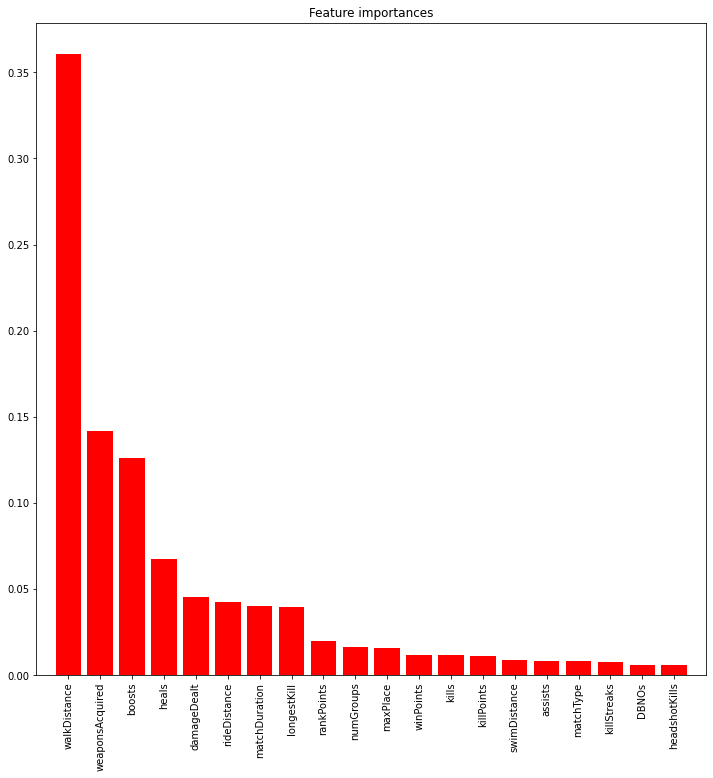

(605937, 20)


In [17]:
# PCA 적용
if feature_reducing == "correlation":
    threshold = 0.7
    correlated_features = remove_collinearity(trainX, threshold)
    correlated_features = set(correlated_features) # 중복 제거
    print("%d Correlation features over %.2f" % (len(correlated_features), threshold))
    
    X = trainX.drop(columns=correlated_features)
    print(X.shape)
    
elif feature_reducing == "feature_importance":
    show_plot = True
    model = RandomForestRegressor(max_features="sqrt", n_jobs=-1, random_state=0xC0FFEE)
    model.fit(trainX, y)
    important_features = find_feature_importance(trainX, model, show_plot)
    X = trainX[important_features]
    print(X.shape)
    
elif feature_reducing == "PCA":
    show_plot = True
    pca_model, X = apply_PCA(trainX, show_plot)
    print(X.shape)

In [ ]:
#이작업이 필요없나?
# trainX=trainX[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
#        'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
#        'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'rideDistance',
#        'swimDistance', 'walkDistance', 'weaponsAcquired', 'winPoints']]
# testX=testX[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
#        'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
#        'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'rideDistance',
#        'swimDistance', 'walkDistance', 'weaponsAcquired', 'winPoints']]

In [18]:
print(trainX.shape, testX.shape, y.shape)

(605937, 24) (1934174, 24) (605937,)


In [ ]:
### 4. 학습 데이터 분할

In [19]:
# 첫번째 테스트용으로 사용하고, 실제 학습시에는 K-Fold CV를 사용합니다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0xC0FFEE)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(484749, 20) (121188, 20) (484749,) (121188,)


In [ ]:
### 5. 학습 및 평가 (debugging 용도)

In [ ]:
print("\nFitting Random Forest...")
model = RandomForestRegressor(max_features='sqrt', n_jobs=-1)
model.fit(X_train, y_train)


Fitting Random Forest...


RandomForestRegressor(max_features='sqrt', n_jobs=-1)

In [20]:
from lightgbm.sklearn import LGBMRegressor
print("\nFitting LGBM...")
model = LGBMRegressor()
model.fit(X_train, y_train)


Fitting LGBM...


LGBMRegressor()

In [21]:
# metric은 그때마다 맞게 바꿔줘야 합니다.
from sklearn.metrics import mean_absolute_error
evaluation_metric = mean_absolute_error

In [22]:
print("Prediction")
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)


train_score = evaluation_metric(y_train, pred_train)
test_score = evaluation_metric(y_test, pred_test)

print("Train Score : %.4f" % train_score)
print("Test Score : %.4f" % test_score)

Prediction
Train Score : 0.0891
Test Score : 0.0893


In [ ]:
### 6. Hyper-parameter Tuning
#- optuna를 갈아넣습니다!

In [ ]:
# For Regression

def optimizer(trial, X, y, K):
    # 조절할 hyper-parameter 조합을 적어줍니다.
    n_estimators = trial.suggest_int("n_estimators", 50, 200)
    max_depth = trial.suggest_int("max_depth", 8, 30)
    max_features = trial.suggest_categorical("max_features", ['auto', 'sqrt', 'log2'])
    
    
    # 원하는 모델을 지정합니다, optuna는 시간이 오래걸리기 때문에 저는 보통 RF로 일단 테스트를 해본 뒤에 LGBM을 사용합니다.
    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  n_jobs=-1,
                                  random_state=0xC0FFEE)
    
    
    # K-Fold Cross validation을 구현합니다.
    folds = KFold(n_splits=K)
    scores = []
    
    for train_idx, val_idx in folds.split(X, y):
        X_train = X.iloc[train_idx, :]
        y_train = y.iloc[train_idx]
        
        X_val = X.iloc[val_idx, :]
        y_val = y.iloc[val_idx]
        
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        score = evaluation_metric(y_val, preds)
        scores.append(score)
    
    
    # K-Fold의 평균 loss값을 돌려줍니다.
    return np.mean(scores)

In [ ]:
K = 5 # Kfold 수
opt_func = partial(optimizer, X=X_train, y=y_train, K=K)

rf_study = optuna.create_study(study_name="RF", direction="maximize") # regression task에서 R^2를 최대화!
rf_study.optimize(opt_func, n_trials=13)

[I 2022-06-10 13:31:34,134] A new study created in memory with name: RF
[I 2022-06-10 13:42:52,093] Trial 0 finished with value: 0.09174614182930212 and parameters: {'n_estimators': 149, 'max_depth': 29, 'max_features': 'log2'}. Best is trial 0 with value: 0.09174614182930212.
[I 2022-06-10 14:26:06,721] Trial 1 finished with value: 0.09138809203846195 and parameters: {'n_estimators': 171, 'max_depth': 21, 'max_features': 'auto'}. Best is trial 0 with value: 0.09174614182930212.
[I 2022-06-10 14:36:55,906] Trial 2 finished with value: 0.0910533035194486 and parameters: {'n_estimators': 66, 'max_depth': 12, 'max_features': 'auto'}. Best is trial 0 with value: 0.09174614182930212.
[I 2022-06-10 14:55:22,390] Trial 3 finished with value: 0.09165253606840279 and parameters: {'n_estimators': 74, 'max_depth': 21, 'max_features': 'auto'}. Best is trial 0 with value: 0.09174614182930212.
[I 2022-06-10 14:59:36,742] Trial 4 finished with value: 0.09421475103499893 and parameters: {'n_estimators

In [ ]:
# optuna가 시도했던 모든 실험 관련 데이터
rf_study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_max_depth,params_max_features,params_n_estimators,state
0,0,0.091746,2022-06-10 13:31:34.140980,2022-06-10 13:42:52.093424,0 days 00:11:17.952444,29,log2,149,COMPLETE
1,1,0.091388,2022-06-10 13:42:52.099455,2022-06-10 14:26:06.721393,0 days 00:43:14.621938,21,auto,171,COMPLETE
2,2,0.091053,2022-06-10 14:26:06.726531,2022-06-10 14:36:55.906506,0 days 00:10:49.179975,12,auto,66,COMPLETE
3,3,0.091653,2022-06-10 14:36:55.910255,2022-06-10 14:55:22.390079,0 days 00:18:26.479824,21,auto,74,COMPLETE
4,4,0.094215,2022-06-10 14:55:22.392700,2022-06-10 14:59:36.741835,0 days 00:04:14.349135,13,sqrt,102,COMPLETE
5,5,0.092540,2022-06-10 14:59:36.744586,2022-06-10 15:28:59.247539,0 days 00:29:22.502953,29,auto,105,COMPLETE
6,6,0.091737,2022-06-10 15:28:59.254137,2022-06-10 15:33:21.188273,0 days 00:04:21.934136,22,log2,67,COMPLETE
7,7,0.100989,2022-06-10 15:33:21.191581,2022-06-10 15:36:26.463577,0 days 00:03:05.271996,9,log2,103,COMPLETE
8,8,0.090773,2022-06-10 15:36:26.471545,2022-06-10 16:08:57.659981,0 days 00:32:31.188436,13,auto,190,COMPLETE
9,9,0.091425,2022-06-10 16:08:57.663512,2022-06-10 16:20:12.552007,0 days 00:11:14.888495,20,log2,186,COMPLETE


In [ ]:
print("Best Score: %.4f" % rf_study.best_value) # best score 출력
print("Best params: ", rf_study.best_trial.params) # best score일 때의 하이퍼파라미터들

Best Score: 0.1044
Best params:  {'n_estimators': 135, 'max_depth': 8, 'max_features': 'sqrt'}


In [ ]:
# 실험 기록 시각화
optuna.visualization.plot_optimization_history(rf_study)

In [ ]:
# hyper-parameter들의 중요도
optuna.visualization.plot_param_importances(rf_study)

In [ ]:
### 7. 테스트 및 제출 파일 생성

In [ ]:
final_rf_model = RandomForestRegressor(n_estimators=rf_study.best_trial.params["n_estimators"],
                                 max_depth=rf_study.best_trial.params["max_depth"],
                                 max_features=rf_study.best_trial.params["max_features"])

final_rf_model.fit(X, y) # finalize model

RandomForestRegressor(max_depth=8, max_features='sqrt', n_estimators=135)

In [ ]:
testX

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,0,0,51.46,0,0,0,0,0,0,0.00,...,1500,0,0.0,0,0.000,0,0,588.00,1,0
1,0,4,179.10,0,0,2,0,2,1,361.90,...,1503,2,4669.0,0,0.000,0,0,2017.00,6,0
2,1,0,23.40,0,0,4,0,0,0,0.00,...,1565,0,0.0,0,0.000,0,0,787.80,4,0
3,0,0,65.52,0,0,0,0,0,0,0.00,...,1465,0,0.0,0,0.000,0,0,1812.00,3,0
4,0,4,330.20,1,2,1,0,3,1,60.06,...,1480,1,0.0,0,0.000,0,0,2963.00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934169,1,2,381.00,3,0,7,1294,4,2,69.27,...,-1,1,0.0,0,0.000,0,0,1799.00,5,1526
1934170,0,0,0.00,0,0,0,1449,0,0,0.00,...,-1,0,0.0,0,0.000,0,0,1195.00,3,1496
1934171,0,0,91.96,0,0,3,0,1,1,25.38,...,1482,0,0.0,0,7.798,1,0,3327.00,3,0
1934172,1,2,138.60,0,0,12,0,1,1,67.89,...,1456,1,0.0,0,0.000,0,0,1893.00,4,0


In [ ]:
# PCA 적용
if feature_reducing == "correlation":
    test = testX.drop(columns=correlated_features)
    print(X.shape)
    
elif feature_reducing == "feature_importance":
    test = testX[important_features]
    print(X.shape)
    
elif feature_reducing == "PCA":
    test = pca_model.transform(testX)
    print(X.shape)

(577051, 20)


In [ ]:
prediction = final_rf_model.predict(test)
prediction

array([0.24519726, 0.83584232, 0.38709856, ..., 0.72371853, 0.78561637,
       0.12688764])

In [ ]:
submission

,Id,winPlacePerc
0,9329eb41e215eb,1
1,639bd0dcd7bda8,1
2,63d5c8ef8dfe91,1
3,cf5b81422591d1,1
4,ee6a295187ba21,1
...,...,...
1934169,a316c3a13887d5,1
1934170,5312146b27d875,1
1934171,fc8818b5b32ad3,1
1934172,a0f91e35f8458f,1


In [ ]:
submission["winPlacePerc"] = prediction
submission

,Id,winPlacePerc
0,9329eb41e215eb,0.245197
1,639bd0dcd7bda8,0.835842
2,63d5c8ef8dfe91,0.387099
3,cf5b81422591d1,0.558789
4,ee6a295187ba21,0.864687
...,...,...
1934169,a316c3a13887d5,0.767066
1934170,5312146b27d875,0.510267
1934171,fc8818b5b32ad3,0.723719
1934172,a0f91e35f8458f,0.785616


In [ ]:
submission.reset_index(drop=True).to_csv(base_path + f"rf_submission_{feature_reducing}.csv", index=False)

In [ ]:
submission.to_csv(base_path+'baseline.csv', index=False)

In [ ]:
# save traind model by pickle
import pickle
with open('PUBG_randomforest_model.pickle', 'wb') as fw:
    pickle.dump(model, fw)

In [ ]:
import pickle 
with open('PUBG_randomforest_model.pickle','rb') as file:
    model = pickle.load(file)

In [ ]:
### 9. LightGBM으로 변경!

In [35]:
# For Regression

def optimizer(trial, X, y, K):
    
    import os
    
    param = {
        'objective': 'regression', # 회귀
        'verbose': 0,
        'max_depth': trial.suggest_int('max_depth', 8, 20),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1e-2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1)
        #"device" : 'gpu'
    }

    model = LGBMRegressor(**param, n_jobs=os.cpu_count())
    
    # K-Fold Cross validation을 구현합니다.
    folds = KFold(n_splits=K)
    scores = []
    
    for train_idx, val_idx in folds.split(X, y):
        X_train = X.iloc[train_idx, :]
        y_train = y.iloc[train_idx]
        
        X_val = X.iloc[val_idx, :]
        y_val = y.iloc[val_idx]
        
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=25)
        preds = model.predict(X_val)
        score = evaluation_metric(y_val, preds)
        scores.append(score)
    
    
    # K-Fold의 평균 loss값을 돌려줍니다.
    return np.mean(scores)

In [ ]:
K = 5 # Kfold 수
opt_func = partial(optimizer, X=X_train, y=y_train, K=K)

lgbm_study = optuna.create_study(study_name="LGBM", direction="minimize") # regression task에서 R^2를 최대화! #mae로 할경우 minimize로 해야한다. 오류가 최소화되는값
lgbm_study.optimize(opt_func, n_trials=13)

In [34]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#gridsearchcv

In [51]:
import os

In [64]:
model = LGBMRegressor(**param_lgb, n_jobs=os.cpu_count())

In [63]:
param_lgb = {'learning_rate' : [0.01,0.1,0.2,0.3,0.4,0.5],
             "max_depth": [25, 50, 75],
             "num_leaves": [100,300,500,900,1200],
             'n_estimators' : [100, 200, 300,500,800,1000],
             'learning_rate' : [0.01,0.1,0.2,0.3,0.4,0.5]
              }

In [69]:
lgb = LGBMClassifier()

In [71]:
cv=KFold(n_splits=5, random_state=1, shuffle=True)

In [72]:
gscv_lgb = GridSearchCV (estimator = lgb, param_grid = param_lgb, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=2)

In [74]:
print('LGB 파라미터: ', gscv_lgb.best_params_)
print('LGB 예측 정확도: {:.4f}'.format(gscv_lgb.best_score_))

AttributeError: ignored

In [75]:
예측 정확도 확인
# GridSearhCV를 이용해 최적으로 estimator로 예측 수행
gb_pred = gscv_lgb.best_estimator_.predict(x_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))


SyntaxError: ignored

In [28]:
y.astype

<bound method NDFrame.astype of 4289863    0.3929
1660760    0.7083
363725     0.8148
1073463    0.3333
414963     0.3214
            ...  
2381585    0.6000
3010658    0.9200
298060     0.7407
3190576    0.4800
2771456    0.9615
Name: winPlacePerc, Length: 605937, dtype: float64>

In [ ]:
# optuna가 시도했던 모든 실험 관련 데이터
lgbm_study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_learning_rate,params_max_depth,params_min_child_samples,params_n_estimators,params_subsample,state
0,0,0.265490,2022-06-13 08:04:02.061691,2022-06-13 08:06:38.636581,0 days 00:02:36.574890,1.491808e-05,18,71,357,0.995969,COMPLETE
1,1,0.252284,2022-06-13 08:06:38.639733,2022-06-13 08:08:26.675618,0 days 00:01:48.035885,2.379889e-04,16,94,285,0.416672,COMPLETE
2,2,0.266633,2022-06-13 08:08:26.682758,2022-06-13 08:11:08.900707,0 days 00:02:42.217949,2.732044e-07,8,29,435,0.411999,COMPLETE
3,3,0.266657,2022-06-13 08:11:08.904548,2022-06-13 08:15:04.742146,0 days 00:03:55.837598,1.483079e-08,15,72,627,0.933699,COMPLETE
4,4,0.258566,2022-06-13 08:15:04.745771,2022-06-13 08:18:31.850060,0 days 00:03:27.104289,6.758051e-05,14,71,555,0.406385,COMPLETE
5,5,0.091468,2022-06-13 08:18:31.853197,2022-06-13 08:23:48.683957,0 days 00:05:16.830760,5.691183e-03,15,18,835,0.967422,COMPLETE
6,6,0.089727,2022-06-13 08:23:48.694631,2022-06-13 08:29:22.582548,0 days 00:05:33.887917,9.579387e-03,16,47,901,0.799967,COMPLETE
7,7,0.266657,2022-06-13 08:29:22.585983,2022-06-13 08:33:55.381334,0 days 00:04:32.795351,1.223653e-08,18,54,708,0.633439,COMPLETE
8,8,0.127995,2022-06-13 08:33:55.385182,2022-06-13 08:35:28.777027,0 days 00:01:33.391845,5.107209e-03,9,87,237,0.880906,COMPLETE
9,9,0.236031,2022-06-13 08:35:28.780233,2022-06-13 08:41:04.522341,0 days 00:05:35.742108,1.788116e-04,13,95,849,0.620751,COMPLETE


In [ ]:
print("Best Score: %.4f" % lgbm_study.best_value) # best score 출력
print("Best params: ", lgbm_study.best_trial.params) # best score일 때의 하이퍼파라미터들

Best Score: 0.0897
Best params:  {'max_depth': 16, 'learning_rate': 0.009579387233777308, 'n_estimators': 901, 'min_child_samples': 47, 'subsample': 0.7999672935170069}


In [ ]:
# 실험 기록 시각화
optuna.visualization.plot_optimization_history(lgbm_study)

In [ ]:
# hyper-parameter들의 중요도
optuna.visualization.plot_param_importances(lgbm_study)

In [ ]:
trial = lgbm_study.best_trial
trial_params = trial.params

final_lgb_model = LGBMRegressor(**trial_params)
final_lgb_model.fit(X, y) # finalize model

LGBMRegressor(learning_rate=0.009579387233777308, max_depth=16,
              min_child_samples=47, n_estimators=901,
              subsample=0.7999672935170069)

In [ ]:
# PCA 적용
if feature_reducing == "correlation":
    test = testX.drop(columns=correlated_features)
    print(X.shape)
    
elif feature_reducing == "feature_importance":
    test = testX[important_features]
    print(X.shape)
    
elif feature_reducing == "PCA":
    test = pca_model.transform(testX)
    print(X.shape)
    
prediction = final_lgb_model.predict(test)
submission["y"] = prediction
display(submission)
submission.reset_index(drop=True).to_csv(f"lgbm_submission_{feature_reducing}.csv", index=False)

(605937, 20)


,Id,winPlacePerc,y
0,9329eb41e215eb,0.240924,0.244563
1,639bd0dcd7bda8,0.878977,0.865182
2,63d5c8ef8dfe91,0.390883,0.398984
3,cf5b81422591d1,0.536728,0.539391
4,ee6a295187ba21,0.895912,0.891872
...,...,...,...
1934169,a316c3a13887d5,0.728025,0.732167
1934170,5312146b27d875,0.512039,0.510841
1934171,fc8818b5b32ad3,0.852011,0.845347
1934172,a0f91e35f8458f,0.806996,0.811398


In [ ]:
testX[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'rideDistance',
       'swimDistance', 'walkDistance', 'weaponsAcquired', 'winPoints']]

In [ ]:
#제출하기

testX=testX[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'rideDistance',
       'swimDistance', 'walkDistance', 'weaponsAcquired', 'winPoints']]

pred_test = model.predict(testX)
pred_test

array([0.24092415, 0.87897705, 0.39088279, ..., 0.85201085, 0.80699629,
       0.12264806])

In [ ]:
len(pred_test)

1934174

In [ ]:
len(submission)

1934174

In [ ]:
submission["winPlacePerc"]=pred_test

In [ ]:
display(submission)

,Id,winPlacePerc
0,9329eb41e215eb,0.240924
1,639bd0dcd7bda8,0.878977
2,63d5c8ef8dfe91,0.390883
3,cf5b81422591d1,0.536728
4,ee6a295187ba21,0.895912
...,...,...
1934169,a316c3a13887d5,0.728025
1934170,5312146b27d875,0.512039
1934171,fc8818b5b32ad3,0.852011
1934172,a0f91e35f8458f,0.806996


In [ ]:
submission.reset_index(drop=True).to_csv(base_path + f"rf_submission_lightGBM{feature_reducing}.csv", index=False)